<a href="https://colab.research.google.com/github/augustoberwaldt/mackenzie/blob/main/NPL(_processamento_de_linguagem_natural).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chegou a hora de você mostrar o que você aprendeu. Nas últimas três trilhas, discutimos algumas coisas de processamento de linguagem natural.

Aprendemos a extrair palavras-chave de anúncios classificados, identificar padrões em autoria de textos e, a partir do uso de palavras em alguns textos, classificá-las quanto ao sentimento positivo ou negativo.

Escolha uma corpora de documentos correlatos e extraia as suas principais palavras e apresente um histograma.

Documentos correlatos podem ser diversos artigos de um mesmo autor, diversas matérias jornalísticas sobre um mesmo tema (futebol, política, etc.), review de um mesmo grupo de produto ou serviços (notas de cinema, restaurante, etc.).

Para os alunos que não desejarem criar umweb cralwer para buscar os dados poderão buscar alguma fonte confiável na internet ou utilizar a lista de artigos de diversos blogueiros disponibilizado pelo professor no GitHub.

Por favor enviar:

Uma página no Word descrevendo suscintamente o projeto escolhido e os resultados obtidos.

Para o caso de usar uma fonte externa detalhar a origem da fonte e enviar a base de dados usada no projeto.

Para o caso de construir um web crawler próprio, enviar também a base de dados adquirida no projeto.

Para o caso de usar a base de dados disponibilizada pelo professor, explicar qual caso escolhido e reenviar a base de dados.

O programa em python (ou caderno do Jupyter) com o código com comentários.

In [14]:
 #imports
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk;
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import matplotlib.pyplot as plt


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


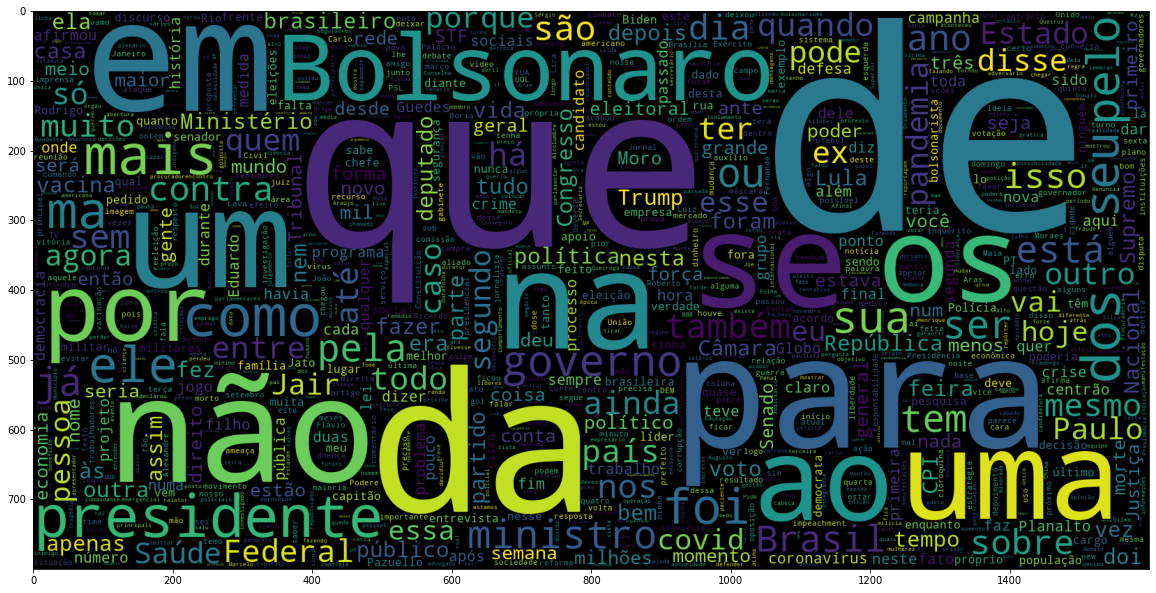

In [15]:
df = pd.read_json("https://raw.githubusercontent.com/lucianomcsilva/articulistas/main/UolBlogs.json")
df['content'] = df['content'].apply(lambda x: x.replace("\n","") )
df['words'] = df['content'].str.split().str.len();

df.head()

# remove qulquer artigo que tenha gerado menos que 100 palavras
df = df.loc[(df['words'] > 100)]

wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(df['content']))

              
plt.figure(figsize = (20,20))
plt.imshow(wc)

<Figure size 3600x5040 with 0 Axes>

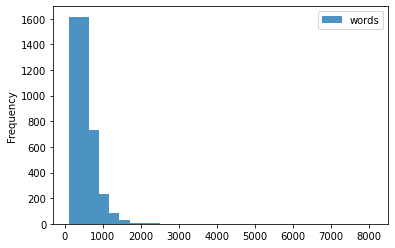

In [20]:
plt.figure(figsize = (50,70))
df.plot.hist(bins=30, alpha=0.8)